In [1]:
mpl.rcParams['pgf.texsystem'] = 'pdflatex'

In [93]:
nbins = 30
var_bins = {
   'pt6bsum' : np.linspace(200, 1000, nbins),
   'dR6bmin' : np.linspace(0, 2, nbins),
   'dEta6bmax' : np.linspace(0.4, 2, nbins),
   'HX_pt' : np.linspace(0, 600, nbins),
   'HY1_pt' : np.linspace(0, 400, nbins),
   'HY2_pt' : np.linspace(0, 400, nbins),
   'HX_dr' : np.linspace(0, 4, nbins),
   'HY1_dr' : np.linspace(0, 5, nbins),
   'HY2_dr' : np.linspace(0, 5, nbins),
   'HX_m' : np.linspace(135, 215, nbins),
   'HY1_m' : np.linspace(135, 215, nbins),
   'HY2_m' : np.linspace(135, 215, nbins),
   'HX_HY1_dEta' : np.linspace(0, 6, nbins),
   'HY1_HY2_dEta' : np.linspace(0, 6, nbins),
   'HY2_HX_dEta' : np.linspace(0, 6, nbins),
   'HX_HY1_dPhi' : np.linspace(0, 3.2, nbins),
   'HY1_HY2_dPhi' : np.linspace(0, 3.2, nbins),
   'HY2_HX_dPhi' : np.linspace(0, 3.2, nbins),
   'HX_costheta' : np.linspace(0, 1, nbins),
   'HY1_costheta' : np.linspace(0,1 , nbins),
   'HY2_costheta' : np.linspace(0, 1, nbins),
   'X_m' : np.linspace(400,1500,nbins)
}


In [94]:
len(variables)

19

In [3]:

def producePulls(datTree, variables, pdf):
   V_SRhs_mask = datTree.V_SRhs_mask
   V_SRls_mask = datTree.V_SRls_mask

   # fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,8), gridspec_kw={'height_ratios':[4,1]})
   fig, axs = fig_ax_ratio()

   pulls = []
   for var in variables:
      original = datTree.np(var)[V_SRls_mask]
      target = datTree.np(var)[V_SRhs_mask]
      norm = len(target)/sum(datTree.V_SR_weights)

      bins = var_bins[var]

      pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_SR_weights*norm], pull=True)

      pdf.savefig(bbox_inches='tight')
      fig.clf()
      pulls.append(pull)

   return np.array(pulls)

In [4]:
from configparser import ConfigParser

cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']
pairing = config['pairing']['scheme']
# pairing_type = pairing.split('_')[0]

variables = config['BDT']['variables']
print(variables)
variables = variables.split(', ')

score = float(config['score']['threshold'])


cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']

indir = f"root://cmseos.fnal.gov/{base}"
datFileName = f"{indir}{data}"
datTree = Signal(datFileName)
region_type = 'sphere'

variables = config['BDT']['variables']
variables = variables.split(', ')


pt6bsum, dR6bmin, HY1_pt, HY2_pt, HY1_dr, HY2_dr, HX_dr, HX_m, HY1_m, HY1_HY2_dEta, HY2_HX_dEta, HX_HY1_dPhi, HY1_HY2_dPhi, HY2_HX_dPhi, HY1_HY2_dR, HX_HY2_dR, HY1_costheta, HY2_costheta, HX_costheta


In [7]:
datTree.spherical_region(config)
datTree.bdt_process(region_type, config)

VR_center   = 178
SR_edge     = 35
CR_edge     = 40
--------------------

.. training BDT in V_CR
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit
.. predicting weights in CR

.. predicting weights in V_SR

.. training BDT in A_CR
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit

.. predicting weights in A_SR



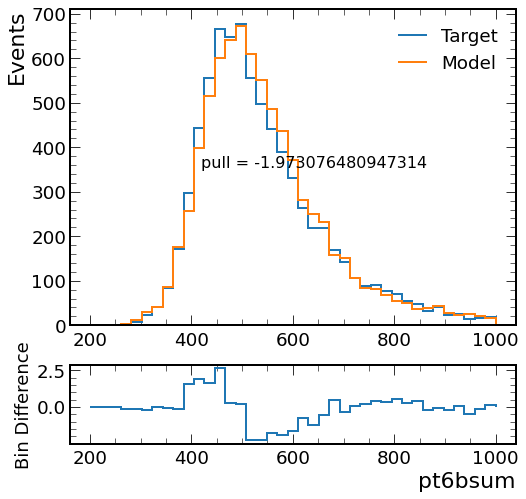

In [65]:
var = variables[0]

fig, axs = fig_ax_ratio()

V_SRhs_mask = datTree.V_SRhs_mask
V_SRls_mask = datTree.V_SRls_mask

original = datTree.np(var)[V_SRls_mask]
target = datTree.np(var)[V_SRhs_mask]
norm = sum(datTree.V_CRhs_mask)/sum(datTree.V_CR_weights)
norm = 1

bins = np.linspace(200, 1000, 40)

n_pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_SR_weights*norm], pull=True)

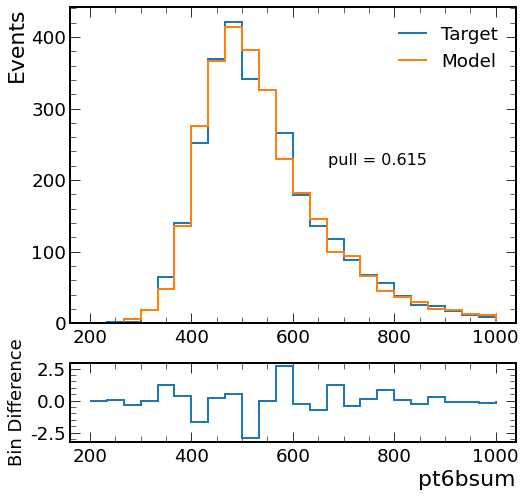

In [63]:
var = variables[0]

fig, axs = fig_ax_ratio()

original = datTree.np(var)[datTree.V_CRls_mask]
target = datTree.np(var)[datTree.V_CRhs_mask]
norm = sum(datTree.V_CRhs_mask)/sum(datTree.V_CR_weights)
# norm = 1

bins = np.linspace(200, 1000, 25)

n_num, n_denom, n_pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_CR_weights*norm], pull=True)

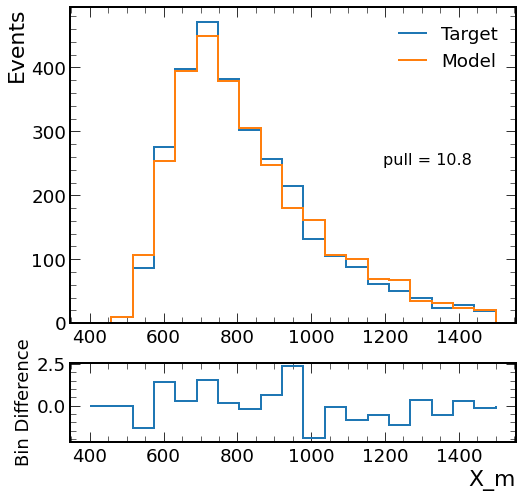

In [74]:
var = 'X_m'

fig, axs = fig_ax_ratio()

original = datTree.np(var)[datTree.V_CRls_mask]
target = datTree.np(var)[datTree.V_CRhs_mask]
norm = sum(datTree.V_CRhs_mask)/sum(datTree.V_CR_weights)
# norm = 1

bins = np.linspace(400, 1500, 20)

n_num, n_denom, n_pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_CR_weights*norm], pull=True)

In [82]:
n_pull.min(), n_pull.max(), n_pull.mean(), n_pull.std()

(-1.955270129161999, 2.3653234594300683, 0.0069754555672116685, 1.0)

Text(0, 1, 'Number of Bins')

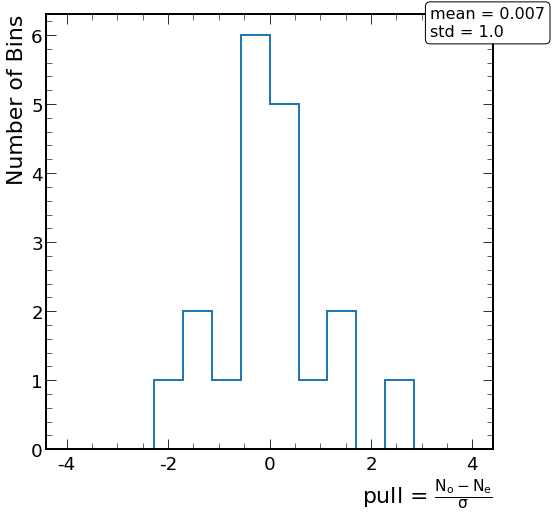

In [92]:
fig, ax = plt.subplots()

n = Hist(n_pull, bins=np.linspace(-4,4,15), ax=ax)

box = {
   'boxstyle' :'round',
   'fc' : 'white'
}
ax.text(0.86,0.95,f"mean = {round(n_pull.mean(),3)}\nstd = {round(n_pull.std(),3)}", transform=ax.transAxes, bbox=box, fontsize=16)
ax.set_xlabel(r'pull = $\frac{N_o - N_e}{\sigma}$')
ax.set_ylabel('Number of Bins')

In [ ]:
var_pulls = {}
for var in variables:
   tvars = variables.copy()
   tvars.remove(var)
   tvars = ", ".join(tvars) # updated training variables
   config['BDT']['variables'] = tvars
   # datTree.spherical_region(config)
   # datTree.bdt_process(region_type, config)

   # try: mkdir(f"plots/{var}")
   # except: pass

   x = np.arange(len(variables))
   fig, ax = plt.subplots()
   Hist(x, weights=pulls, bins=np.arange(len(variables)), ax=ax)
   ax.set_title(f"{var} removed from training", fontsize=20)
   ax.set_ylabel("Pull")
   ax.set_xticks(ticks=x, labels=variables, rotation=-45, fontsize=14, ha='left')
   sys.exit()
